In [6]:
from params import FuzzyInputVariable_3Trapezoids, FuzzyInputVariable_2Trapezoids, FuzzyInputVariable_List_Trapezoids
from operators import productN
import numpy as np
#from helps_and_enhancers import *
import matplotlib.pyplot as plt
from ANFIS5 import ANFIS
import time
import copy
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [7]:
x = np.arange(0, 1.1, 0.1)
xs, ys, zs = np.meshgrid(x, x, x)

data = np.column_stack((xs.flatten(), ys.flatten(), zs.flatten()))
data_labels = np.array([x*y + x*z + y*z for x, y, z in zip(xs.flatten(), ys.flatten(), zs.flatten())])

# x_train, x_test, y_train, y_test = train_test_split(data, data_labels, test_size=0.85)

In [8]:
varX = FuzzyInputVariable_3Trapezoids(1.5, 0.5, 1, 1, "XAxis", ["L","M","H"])
varY = FuzzyInputVariable_3Trapezoids(1.5, 0.5, 1, 1, "YAxis", ["L","M","H"])
varZ = FuzzyInputVariable_3Trapezoids(1.5, 0.5, 1, 1, "ZAxis", ["L","M","H"])

In [9]:
def zadech_t(data, *args):
    return np.min(data, axis=0)

def zadech_s(data, *args):
    return np.max(data, axis=0)

Optymalizacja zakończona!
z blędem:   98.35222083672704
Liczba ew:  1001084
Liczba it:  50
FIS premises [[1.82997184 1.85994516 0.67381083 0.27997442]
 [2.49380614 3.19285099 0.67680109 1.28132496]
 [0.99456361 2.24920213 3.23681119 0.8220499 ]]
TIME elapsed:  4019.317001581192


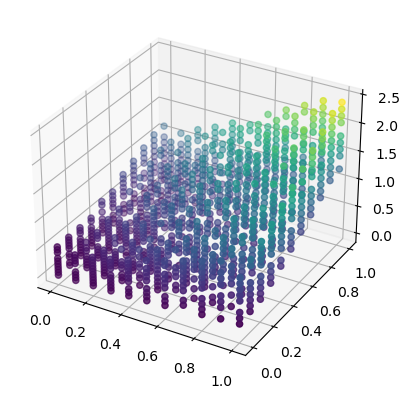

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data, data_labels, test_size=0.2, random_state=25)

fis = ANFIS([varX, varY, varZ], X_train.T, y_train, t_norm=zadech_t, s_norm=zadech_s)

start = time.time()
fis.train(True, True, False, True, n_iter=50)
end = time.time()
print("FIS premises", fis.premises)
print("TIME elapsed: ", end - start)
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results(y_train)

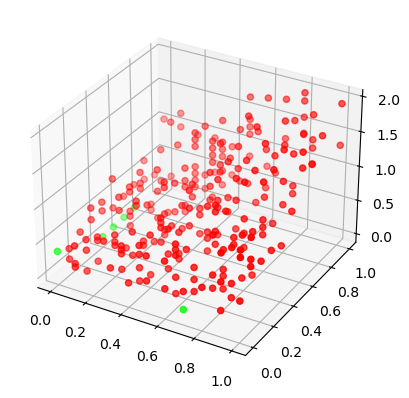

In [18]:
fis.training_data = X_test.T
fis.expected_labels = y_test
fis.show_results()

y_pred = fis.anfis_estimate_labels(fis.premises,fis.op,fis.tsk)
y_pred = list(map(round,y_pred.flatten()))

In [15]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error

In [13]:
print(mean_absolute_percentage_error(y_true=y_test, y_pred=y_pred))

0.6128804041831599


In [16]:
print(mean_squared_error(y_true=y_test, y_pred=y_pred))

0.09555355805243446


In [17]:
print(mean_absolute_error(y_true=y_test, y_pred=y_pred))

0.26172284644194754
